In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score
import numpy as np

In [2]:
#reading datasets 
population_density = pd.read_csv('pd_data.csv', usecols=['Country', 'Year', 'Population density'])
HIEF_data = pd.read_csv('HIEF_data.csv', usecols=['Country', 'Year', 'EFindex'])
popdensity_projections = pd.read_csv('projections.csv')

In [3]:
# Functions 

# Filter function by score 
def filter_by_r2(df, lower_bound, upper_bound):
    """
    Filter a DataFrame to include only rows where the 'R^2 score' column 
    is within the specified range.

    Parameters:
        df (DataFrame): The DataFrame to filter.
        lower_bound (float): The lower bound for 'R^2 score'.
        upper_bound (float): The upper bound for 'R^2 score'.

    Returns:
        DataFrame: Filtered DataFrame.
    """
    return df[(df['R^2 score'] < upper_bound) & (df['R^2 score'] > lower_bound)]

# Based on fitted parameters we predict the ELF using future projected population densities
def predict_elf(row, df):
    # Get country name and its corresponding population densities 
    country = row['Country']
    density = row['Population Density']

    # Get the coefficient and intercept for the specified country from coeff_df
    country_results = df[df['Country'] == country]
    slope = country_results['Coefficient'].iloc[0]
    intercept = country_results['Intercept'].iloc[0]
    
    # Predict ELF index
    predicted_elf = slope * density + intercept
    return predicted_elf

# Displays predicted ELF for a given country and date in the future
def print_predicted_elf(df, country, year):
    """
    Print the filtered DataFrame based on country and year between 2014-2050.

    Parameters:
        df (DataFrame): The DataFrame to filter.
        country (str): The name of the country to filter by.
        year (int): The year to filter by.

    Returns:
        None
    """
    filtered_df = df[(df['Country'] == country) & (df['Year'] == year)]
    print(filtered_df)

# Function to plot actual vs. fitted and predicted values for a specified country
def plot_country_regression(country):
    # Filter data for the specified country
    country_data = merged_df[merged_df['Country'] == country]
    
    # Get the coefficient and intercept for the specified country from results_df
    country_results = coeff_df[coeff_df['Country'] == country].iloc[0]
    slope = country_results['Coefficient']
    intercept = country_results['Intercept']
    
    # Define the independent and dependent variables
    X = country_data['Year'].values
    y = country_data['EFindex'].values
    pop_density = country_data['Population density'].values
    
    # Calculate the fitted values using the slope and intercept
    y_pred = slope * pop_density + intercept
    
    # Filter the predicted values from final_df
    predicted_data = predicted_elf[predicted_elf['Country'] == country]
    X_pred = predicted_data['Year'].values
    y_predicted = predicted_data['Predicted ELF'].values

    # Get the first value of X_pred and y_predicted
    first_X = X_pred[0]
    first_y_pred = y_predicted[0]
    
    # Concatenate the first value of X_pred and y_predicted with the end of X and y_pred
    combined_X = np.concatenate((X, [first_X]))
    combined_y = np.concatenate((y_pred, [first_y_pred]))

    # Plot the actual population density vs. ELF with year on x-axis
    plt.figure(figsize=(12, 8))
    
    # Plot actual ELF values
    plt.scatter(X, y, color='blue', label='Actual ELF')

    # Plot combined fitted and predicted ELF values
    plt.plot(combined_X, combined_y, color='red', linewidth=2, label='Predicted ELF (1945-2013)')

    # Plot predicted ELF values
    plt.plot(X_pred, y_predicted, color='green', label='Predicted ELF (2014-2050)')
    
    # Add titles and labels
    plt.title(f'Actual vs Fitted vs Predicted ELF for {country}')
    plt.xlabel('Year')
    plt.ylabel('Values')
    plt.legend()
    
    # Show the plot
    plt.show()

def plot_country_regression1(country):
    # Filter data for the specified country
    country_data = merged_df[merged_df['Country'] == country]
    
    # Get the coefficient and intercept for the specified country from results_df
    country_results = coeff_df[coeff_df['Country'] == country].iloc[0]
    slope = country_results['Coefficient']
    intercept = country_results['Intercept']
    
    # Define the independent and dependent variables
    X = country_data['Population density'].values
    y = country_data['EFindex'].values
    
    # Plot EFindex vs Population density
    plt.scatter(X, y, color='blue', label='Actual relationship')
    
    # Add regression line
    y_values = slope * X + intercept
    plt.plot(X, y_values, color='red', label='Predicted relationship')
    
    # Add titles and labels
    plt.title(f'{country}: EFindex vs Population Density')
    plt.xlabel('Population Density')
    plt.ylabel('EFindex')
    plt.legend()
    
    # Show the plot
    plt.show()


In [4]:
# Merge population density and HIEF data so we can have the ELF and population density values in the same dataframe to perform linear regression on
merged_df = pd.merge(population_density, HIEF_data, on=['Country', 'Year'])

In [5]:
# In this cell we perform linear regression over all the countries and get the slope, intercept and r square score

results = []
# Loop through each unique country
for country in merged_df['Country'].unique():
    # Filter data for the current country
    country_data = merged_df[merged_df['Country'] == country]
    
    # Define the independent and dependent variables
    X = country_data[['Population density']].values      #independant
    y = country_data['EFindex'].values                   #dependant 
    
    # Fit the linear regression model
    regressor = LinearRegression()
    regressor.fit(X, y)
    
    # Predict values
    y_pred = regressor.predict(X)
    
    # Calculate metrics
    r2 = r2_score(y, y_pred)
    
    # Store results
    results.append({
        'Country': country,
        'Coefficient': regressor.coef_[0],
        'Intercept': regressor.intercept_,
        'R^2 score': r2
    })

# Create a results dataframe
coeff_df = pd.DataFrame(results)

# Print results
print(coeff_df)

                            Country  Coefficient  Intercept  R^2 score
0                       Afghanistan     0.005688   0.536927   0.739871
1                           Albania     0.000670   0.030429   0.621526
2                           Algeria     0.003423   0.313084   0.944473
3                            Angola     0.000021   0.776967   0.007922
4                         Argentina     0.010514  -0.012653   0.992578
..                              ...          ...        ...        ...
151                       Venezuela     0.002643   0.432445   0.991223
152  Democratic Republic of Vietnam    -0.000006   0.264594   0.778617
153                           Yemen    -0.001555   0.193995   0.876517
154                          Zambia    -0.006542   0.843080   0.986673
155                        Zimbabwe     0.001821   0.346135   0.846226

[156 rows x 4 columns]


In [6]:
# Make a copy of popdensity_projections so that we that original dataframe does not get affected when we change it
predicted_elf = popdensity_projections.copy()

# Apply the prediction function to the copied DataFrame and add a new column 'Predicted ELF' with the predicted value
predicted_elf['Predicted ELF'] = predicted_elf.apply(predict_elf, axis=1, df=coeff_df)

In [7]:
# Find the predicted ELF for any country and year
country_to_predict = "Iran"
year_to_predict = 2050
print_predicted_elf(predicted_elf, country_to_predict, year_to_predict)

     Country  Year  Population Density  Predicted ELF
2515    Iran  2050                60.8       0.753943


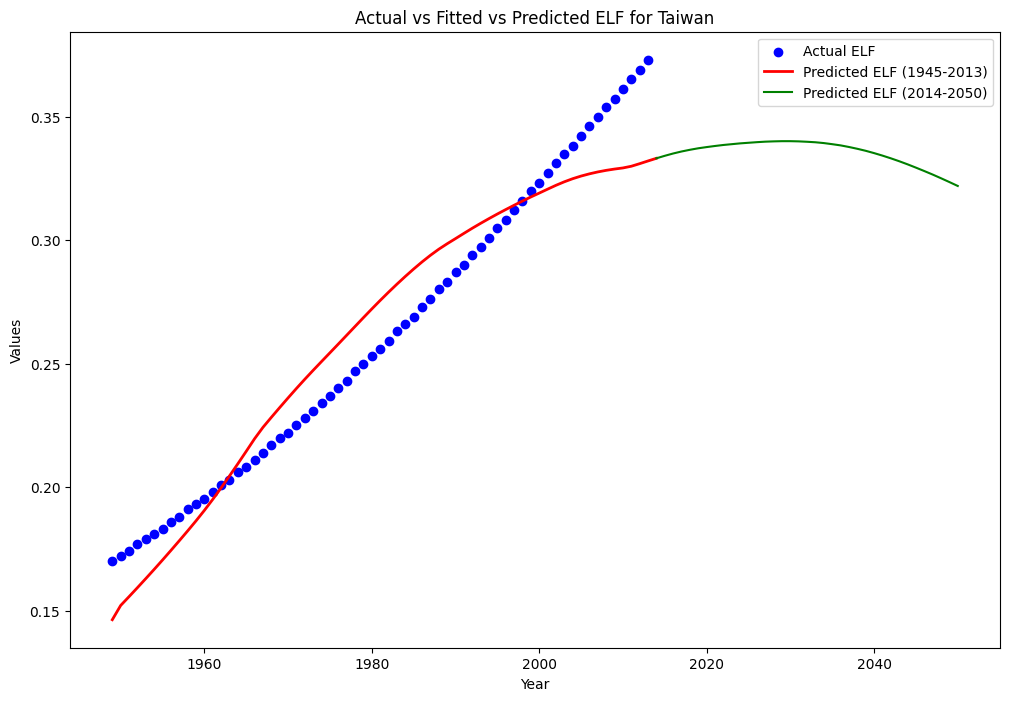

In [8]:
# Plot actual ELF vs fitted and future predicted ELF
country_to_plot = "Taiwan"
plot_country_regression(country_to_plot)

------------------------------------------------------------------------------------------------------------------------------------------------

In [9]:
# In case future work needs to be done to find better fits we can filter to check countries which aren't plotted well and might need to be done manually

#In this case we find accuracy values < 10%
filtered = filter_by_r2(coeff_df, 0, 0.1)
print(filtered)

         Country   Coefficient  Intercept  R^2 score
3         Angola  2.051087e-05   0.776967   0.007922
19      Bulgaria  5.266598e-04   0.223144   0.046147
56         Ghana  8.754034e-07   0.735926   0.032720
64       Hungary  1.954358e-03  -0.120606   0.024030
74    Kazakhstan -3.567765e-02   0.833102   0.044481
112  Philippines  1.244007e-05   0.817992   0.010998


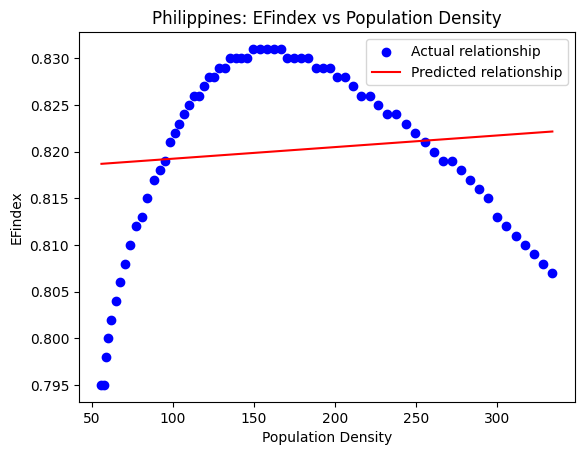

In [10]:
# Example usage
plot_country_regression1("Philippines")